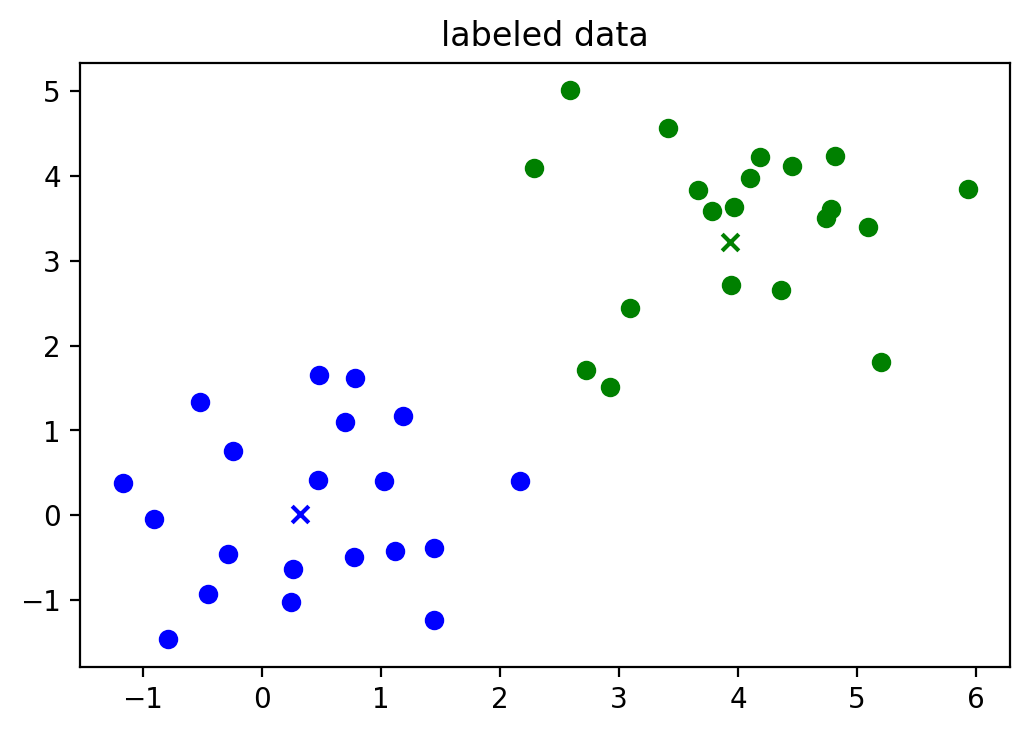

In [307]:
import numpy as np
from numpy.random import multivariate_normal as normal
from numpy.random import random as rand
import matplotlib.pyplot as plt

##no of points per cluster
N = 20


##define means and covariances of the two Gaussians to draw samples from
means = rand((2,2))
means[0] += 3
covs = np.array([np.eye(2),np.eye(2)])

##make sure covariance matrix is positive semidefinite
for i in range(2):
    covs[i] = np.dot(covs[i],covs[i].T)

##generate two clusters of data points
c1 = normal(means[0],covs[0],N)
c2 = normal(means[1],covs[1],N)



plt.figure(dpi=200)
plt.title("labeled data")
plt.scatter(means[0,0], means[0,1],marker = "x",color = "g")
plt.scatter(means[1,0], means[1,1],marker = "x",color = "b")
plt.scatter(c1[:,0],c1[:,1],color = 'g')
plt.scatter(c2[:,0],c2[:,1],color = 'b')

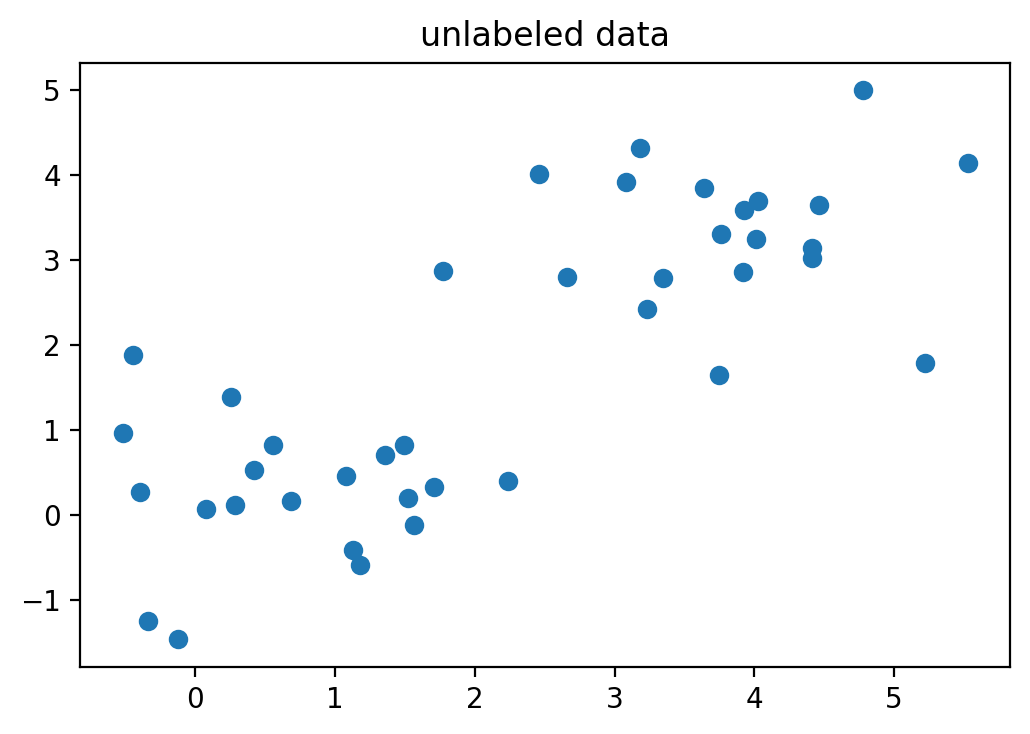

In [304]:
##now lets assume we don't know the acutal distribution
data = np.concatenate((c1,c2))
plt.figure(dpi=200)
plt.title("unlabeled data")
plt.scatter(data[:,0],data[:,1])

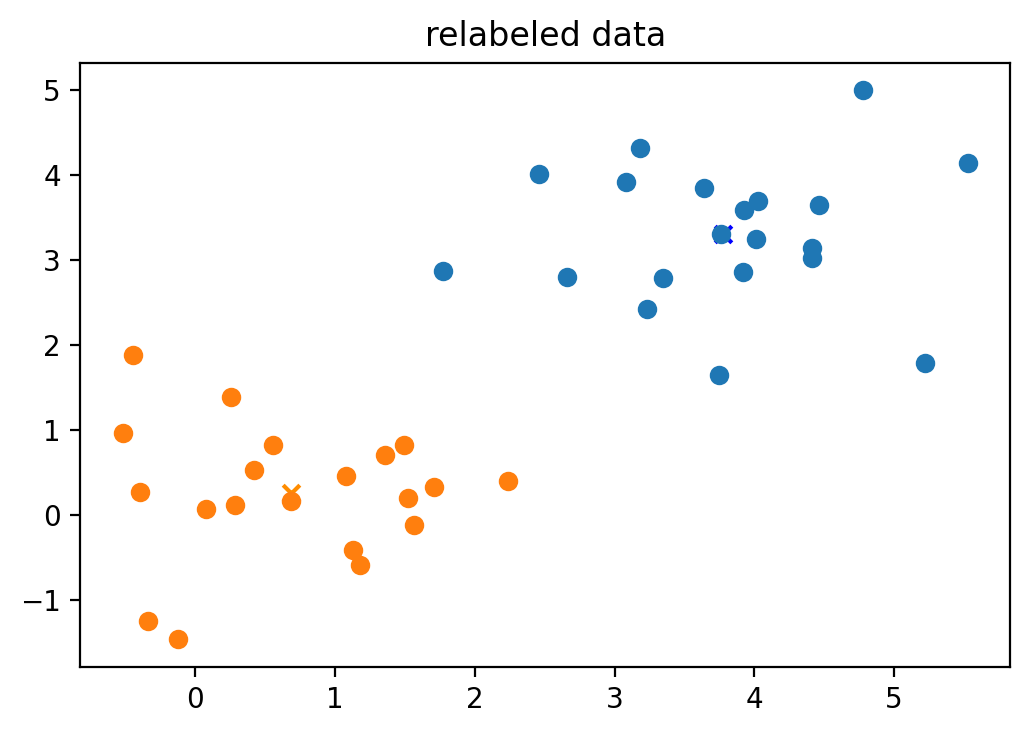

In [306]:
import pandas as pd

##initial guesses for the means
mu = rand((2,2))

##array of rnk's
r = np.zeros((N,2))


##function to compute distance
def distance(x,mu):
    return np.linalg.norm(x-mu)**2



##do iterations

for count in range(10):
    r = np.zeros((2*N,2))
    for n in range(2*N):
        dist = [distance(data[n], mu[j]) for j in range(2)]
        j = np.argmin(dist)
        r[n,j] = 1
        
        
    #update mus
    for k in range(2):
        num = 0
        for n in range(2*N):
            num += r[n,k]*data[n]
        den = sum(r[:,k])
        mu[k] = num/den


##plot data

dataframe = pd.DataFrame({"x":data[:,0], "y":data[:,1],"color":r[:,0]})
groups = dataframe.groupby("color")

plt.figure(dpi=200)
plt.title("relabeled data")
for name, group in groups:
    plt.plot(group["x"], group["y"], marker="o", linestyle="")
plt.scatter(mu[0,0], mu[0,1] ,marker = "x",color = "darkorange")
plt.scatter(mu[1,0], mu[1,1] ,marker = "x",color = "b")